# Diwali Sales Analysis using Python and Pandas

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #For visualizing Data
%matplotlib inline
import seaborn as sns #For charts and visualizat

In [3]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Drop Blank or unnamed column
df.drop(['Status', 'unnamed1'], axis= 1, inplace= True)

In [7]:
#Check for Null Values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#Delete the NULL values
df.dropna(inplace= True)

In [9]:
df.shape

(11239, 13)

In [10]:
#Change Data Type
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtype

dtype('int32')

In [11]:
#Check all the columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df[['Amount']].describe()

,Amount
count,11239.000000
mean,9453.610553
std,5222.355168
min,188.000000
25%,5443.000000
50%,8109.000000
75%,12675.000000
max,23952.000000


# EXPLORATORY DATA ANALYSIS

Gender Analysis

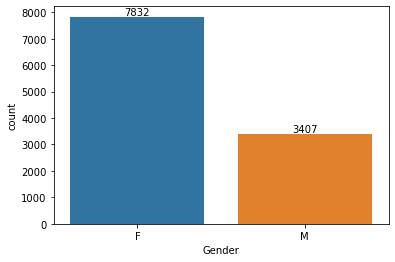

In [21]:
ax = sns.countplot (x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

The graph visually depicts a noteworthy observation: a majority of buyers are identified as female,
and their purchasing influence surpasses that of male buyers.

Age Group

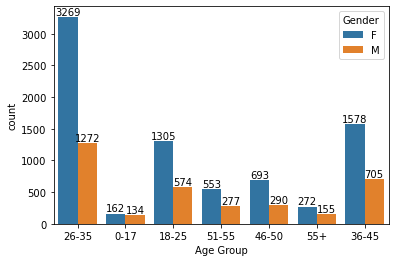

In [19]:
ax = sns.countplot(data= df, x = 'Age Group', hue= 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

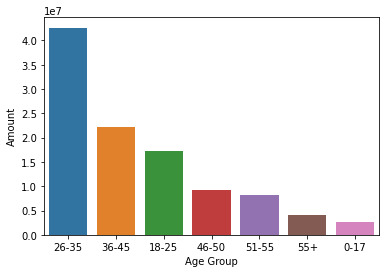

In [20]:
# Total Amount vs age group
sales_age = df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.barplot(x = 'Age Group', y = 'Amount', data= sales_age)

The chart indicates a predominant female presence among buyers, particularly within the age
bracket of 26 to 35 years

# State

<AxesSubplot:xlabel='State', ylabel='Orders'>

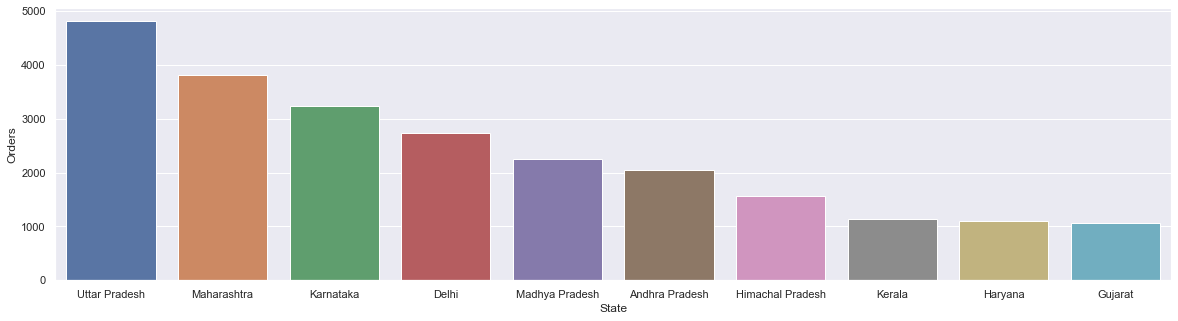

In [22]:
sales_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data= sales_state, x = 'State', y = 'Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

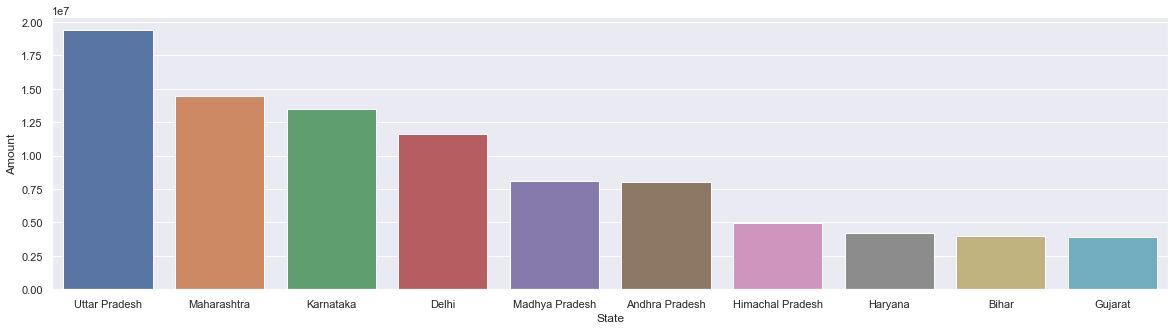

In [23]:
# Total amount of sales from states
sales_state = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False).head(10)
sns.barplot(data= sales_state, x = 'State', y = 'Amount')

The preceding graphs focus on the top 10 states. It’s evident from these graphs that a significant
portion of orders originates from Uttar Pradesh, followed by Maharashtra and Karnataka in terms
of order volume.

# Gender by Marital Status

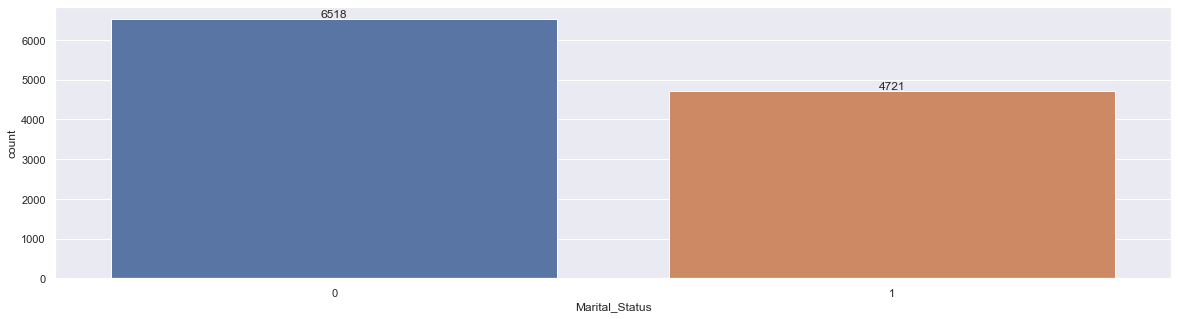

In [25]:
ax = sns.countplot(data=df, x= 'Marital_Status')
sns.set(rc = {'figure.figsize': (6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

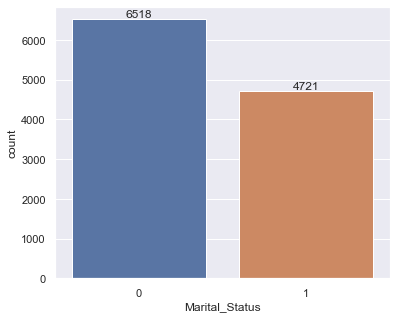

In [26]:
ax = sns.countplot(data=df, x= 'Marital_Status')
sns.set(rc = {'figure.figsize': (6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

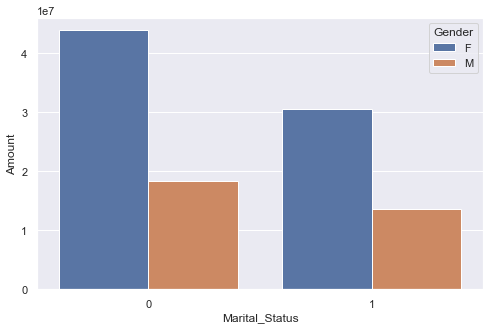

In [27]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.set(rc = {'figure.figsize': (8,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue='Gender')

The provided graphs illustrate that a considerable number of buyers are married women, and this
demographic exhibits substantial purchasing power.

# Occupation

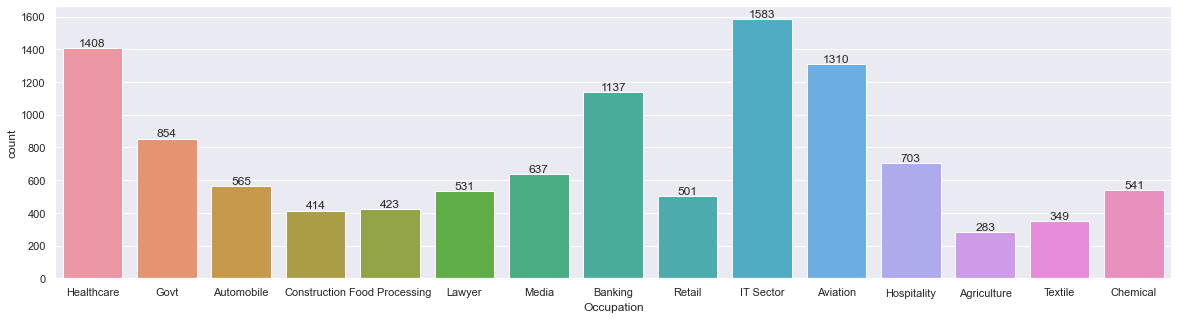

In [29]:
sns.set(rc = {'figure.figsize': (20,5)})
ax = sns.countplot(data= df, x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

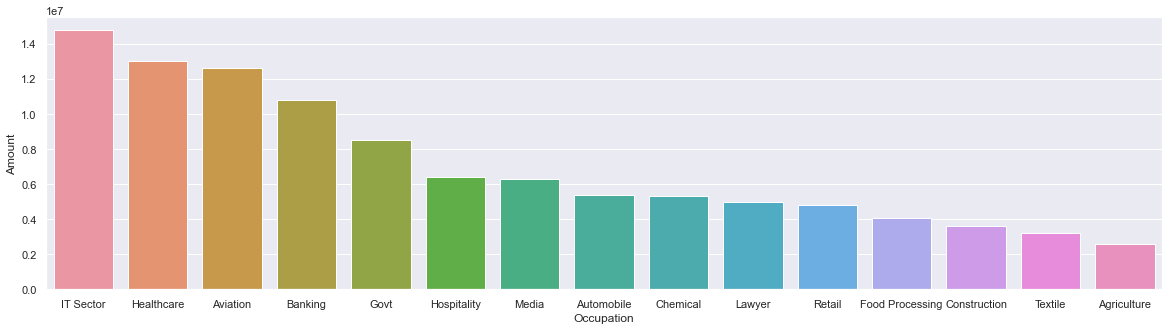

In [30]:
sales_state = df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.set(rc = {'figure.figsize': (20,5)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')

The aforementioned graphs reveal that a substantial portion of buyers are employed in the IT,
Healthcare, and Aviation sectors.

# Product Category

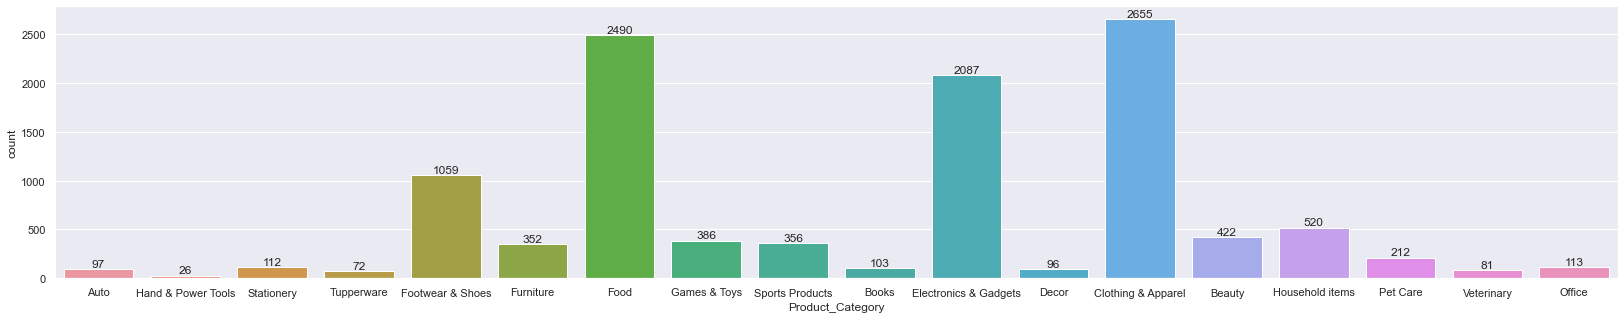

In [31]:
sns.set(rc={'figure.figsize':(28,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers: 
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

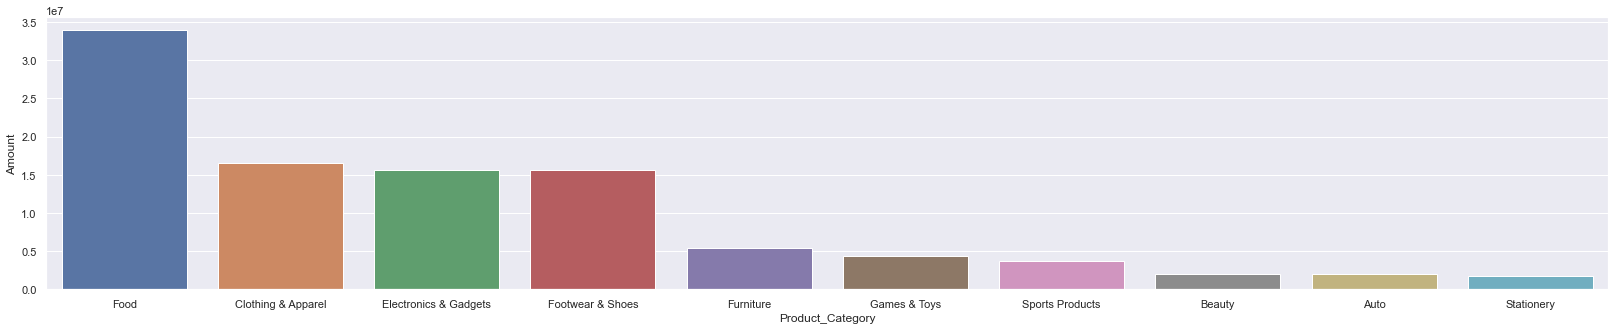

In [32]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(28,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

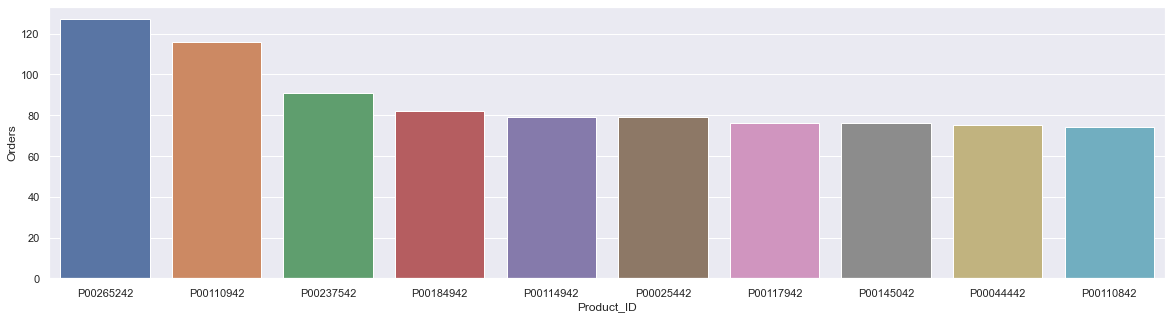

In [34]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

# Conclusion
The data indicates that married women aged 26-35 years, employed in the IT, Healthcare, and
Aviation sectors in Uttar Pradesh, Maharashtra, and Karnataka, show a higher propensity to
purchase items from the Food, Clothing, and Electronics c